## Create NN using Keras for Handwritten Digits Classification

https://keras.io/getting_started/intro_to_keras_for_engineers/

In [1]:
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
keras.__version__

'3.5.0'

## 1. Load the MNIST handwritten digits dataset

    -- MNIST handwritten, 60k 28*28 grayscale images of the 10 digits, along with a test set of 10k images
    -- dataset description: http://yann.lecun.com/exdb/mnist/

In [12]:
(x_train_0, y_train), (x_test_0, y_test) = keras.datasets.mnist.load_data()

#transform images (28*28) to vectors (784*1)
x_train = np.reshape(x_train_0, [x_train_0.shape[0], x_train_0.shape[1] * x_train_0.shape[2]])
x_test = np.reshape(x_test_0, [x_test_0.shape[0], x_test_0.shape[1] * x_test_0.shape[2]])

# data normalization --> [0, 1]
x_train_1 = x_train/255
x_test_1 = x_test/255

print('Training set 0: {} and Training Targets: {}'.format(x_train_0.shape, y_train.shape))
print('Training set: {} and Training Targets: {}'.format(x_train.shape, y_train.shape))
print('Test set: {} and test targets: {}'.format(x_test.shape, y_test.shape))

Training set 0: (60000, 28, 28) and Training Targets: (60000,)
Training set: (60000, 784) and Training Targets: (60000,)
Test set: (10000, 784) and test targets: (10000,)


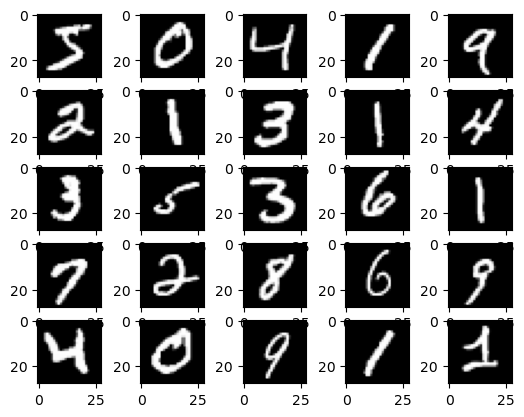

Image labels: [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1]


In [13]:
#show first 25 images
nImg = 5
for i in range(nImg*nImg):
    plt.subplot(nImg, nImg, i+1)
    plt.imshow(x_train_0[i], cmap = 'Greys_r')
plt.show()

print('Image labels:', y_train[:25])

## 2. Using NNs for handwritten digits classification

#### Create an NN using keras

In [15]:
# Create a feedforward NN: 1 hidden layers with 50 hidden unites with sigm activation,
# and one output layer with 10 units for the 10 classes
model = keras.models.Sequential()

# 1st hidden layer
model.add(keras.layers.Dense(units = 50,
                            activation = 'sigmoid'))

# output layer
model.add(keras.layers.Dense(units = 10,
                            input_dim = 50,
                            activation = 'softmax'))

# specify the optimization algo
sgd = keras.optimizers.SGD(learning_rate = 0.001, decay = 1e-7)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

#### Generate the one-hot vector for the training targets

In [14]:
y_train_onehot = keras.utils.to_categorical(y_train)
print(y_train[:5])
y_train_onehot[:5]

[5 0 4 1 9]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

#### Train the NN

In [11]:
history = model.fit(x_train_1, 
          y_train_onehot, 
          batch_size = 64, 
          epochs =20, 
          verbose =1, 
          validation_split = 0.1)

Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.3458 - val_loss: 2.2392
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.2171 - val_loss: 2.1519
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.1384 - val_loss: 2.0739
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.0637 - val_loss: 1.9982
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.9915 - val_loss: 1.9235
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.9201 - val_loss: 1.8497
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.8506 - val_loss: 1.7774
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7813 - val_loss: 1.7065
Epoch 9/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7150 - val_loss: 1.6376
Epoch 10/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.6464 - val_loss: 1.5711
Epoch 11/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.5840 - val_loss: 1.5071
Epoch 12/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

In [16]:
#predict the class labels
y_train_pred_onehot = model.predict(x_train_1)
#print(y_train_pred_onehot[:10])
y_train_pred = np.argmax(y_train_pred_onehot, axis =1)
#print(y_train_pred[:10])
train_err = np.sum(y_train != y_train_pred)/y_train.shape[0]
print('training error rate:', train_err*100) 

y_test_pred_onehot= model.predict(x_test)

y_test_pred = np.argmax(y_test_pred_onehot, axis =1)
#print(y_train_pred[:10])
test_err = np.sum(y_test != y_test_pred)/y_test.shape[0]
print('test error rate:', test_err*100)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
training error rate: 91.99666666666667
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
test error rate: 91.05
